In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.metrics import accuracy_score
from resnet50_mlp_fusion import SupCEResNet_Fusion  
from train import train_model
from data_preprocessing import get_data_loaders
import torch.nn as nn
import torch.optim as optim
from train import train_model

# Device configuration
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Define model
model = SupCEResNet_Fusion(
    name='resnet50',
    num_classes=1,  # Regression or binary classification
    num_features=14,  # Number of biomarkers
    in_channels=3  # RGB images
).to(DEVICE)

# Define the criterion and optimizer
criterion = nn.MSELoss()  # Use MSELoss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=1e-4)
train_loader, val_loader = get_data_loaders()
# Train the model
train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=DEVICE,
    epochs=25  # Specify the number of epochs
)


Epoch 1/25 - Train Loss: 419.5646, Val Loss: 30.1404
Epoch 2/25 - Train Loss: 23.8845, Val Loss: 13.5791
Epoch 3/25 - Train Loss: 13.2225, Val Loss: 8.9391
Epoch 4/25 - Train Loss: 9.2229, Val Loss: 9.4801
Epoch 5/25 - Train Loss: 7.3779, Val Loss: 4.7117
Epoch 6/25 - Train Loss: 6.0788, Val Loss: 6.8703
Epoch 7/25 - Train Loss: 4.8372, Val Loss: 4.6358
Epoch 8/25 - Train Loss: 4.3553, Val Loss: 16.1821
Epoch 9/25 - Train Loss: 3.7550, Val Loss: 2.7401
Epoch 10/25 - Train Loss: 3.2222, Val Loss: 2.5672
Epoch 11/25 - Train Loss: 3.1959, Val Loss: 3.0928
Epoch 12/25 - Train Loss: 2.8914, Val Loss: 3.2105
Epoch 13/25 - Train Loss: 2.2029, Val Loss: 2.6106
Epoch 00014: reducing learning rate of group 0 to 1.0000e-05.
Epoch 14/25 - Train Loss: 2.3549, Val Loss: 5.8975
Epoch 15/25 - Train Loss: 1.1333, Val Loss: 0.9437
Epoch 16/25 - Train Loss: 0.8023, Val Loss: 0.8256
Epoch 17/25 - Train Loss: 0.6624, Val Loss: 0.7835
Epoch 18/25 - Train Loss: 0.5938, Val Loss: 0.6372
Epoch 19/25 - Train Lo

In [3]:
torch.save(model, "resnet50.pth")

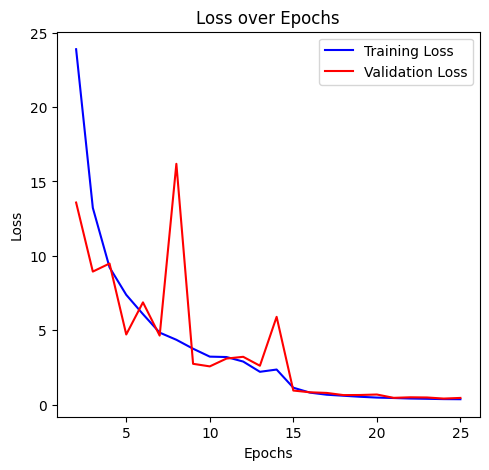

In [5]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1)

# Training loss + validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs[1:], train_losses[1:], label="Training Loss", color="blue")
plt.plot(epochs[1:], val_losses[1:], label="Validation Loss", color="red")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()